In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

##**Sales data need to fetch and do the Data analysis according to problem statement**

####**1.Upload the file and read the data**

In [ ]:
#Upload the file and data fetch
sd = pd.read_csv('/content/drive/MyDrive/sales_dataset.csv')
print(sd)

<ipython-input-2-c81ae1ca1347>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  sd = pd.read_csv('/content/drive/MyDrive/sales_dataset.csv')


                   Order ID      Date                        Status  \
0       405-8078784-5731545  04-30-22                     Cancelled   
1       171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2       404-0687676-7273146  04-30-22                       Shipped   
3       403-9615377-8133951  04-30-22                     Cancelled   
4       407-1069790-7240320  04-30-22                       Shipped   
...                     ...       ...                           ...   
128944  406-6001380-7673107  05-31-22                       Shipped   
128945  402-9551604-7544318  05-31-22                     Cancelled   
128946  407-9547469-3152358  05-31-22                       Shipped   
128947  402-6184140-0545956  05-31-22                       Shipped   
128948  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   SET389   SET

###**2.Display the first five rows of the dataset to understand its structure**

In [ ]:
# Step 1: Display the first five rows of the dataset to understand its structure
sd.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


###**3. Find the NULL VALUES in Amount column**

In [ ]:
print(sd.isnull().sum())
# in amount having 7794 data is Null


Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6871
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49142
B2B                       0
fulfilled-by          89679
Unnamed: 22           49041
dtype: int64


###**4. For Accurate analysis find the median amount**

In [ ]:
# Calculate the median amount
df= pd.DataFrame(sd)
median_amount = sd['Amount'].median()
print(median_amount)

605.0


###**6. Replace the Null valus with medain value to get data**

In [ ]:
# create Data frame , medain value and then replace the null value with meadian value

df['Amount'] = df['Amount'].fillna(median_amount)
print("DataFrame after replacing null values in 'Amount' column with the median:")
print (df['Amount'])

DataFrame after replacing null values in 'Amount' column with the median:
0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128944     517.00
128945     999.00
128946     690.00
128947    1199.00
128948     696.00
Name: Amount, Length: 128949, dtype: float64


###**7. Verify the Amount still getting Null value or not**

In [ ]:
# aftr replacing value with median amount not getting  null values
print (df['Amount'].isnull().sum())

0


In [ ]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [ ]:
print(df['Courier Status'])

0             NaN
1         Shipped
2         Shipped
3             NaN
4         Shipped
           ...   
128944    Shipped
128945    Shipped
128946    Shipped
128947    Shipped
128948    Shipped
Name: Courier Status, Length: 128949, dtype: object


###**8. Total revenue**

In [ ]:
# Calculate the total revenue and find the round figure
TR= df['Amount'].sum()
TR_INR = TR / 1_000
print(f"Total Revenue in Thousands: {TR_INR:.0f}K")


Total Revenue in Thousands: 83291K


###**The average of orders**

In [ ]:
# Calculate the average of orders
average_order_value = df['Amount'].mean()
print("Average Order Value:", average_order_value)

Average Order Value: 645.9184866885357


###**Top selling product category by Quantity**

In [ ]:
# calculate top selling product
top_products = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
print("Top Selling Products:")
print(top_products.head(10))

Top Selling Products:
Category
Set              45288
kurta            45049
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: Qty, dtype: int64


###**Top selling product by quantity and Amount**

In [ ]:
#top selling product by quantity and Amount
top_selling_categories = sd.groupby('Category')[['Qty', 'Amount']].sum().sort_values(by='Qty', ascending=False).head(10)

print("Top Selling Categories by Quantity and Revenue:\n", top_selling_categories)

Top Selling Categories by Quantity and Revenue:
                  Qty       Amount
Category                         
Set            45288  39196086.67
kurta          45049  21295132.70
Western Dress  13943  11212423.69
Top             9902   5347242.30
Ethnic Dress    1052    790362.66
Blouse           864    458408.18
Bottom           398    150667.98
Saree            152    123933.76
Dupatta            3       915.00


###**Total quantity sold per category**

<ipython-input-14-481973035882>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Category', data=category_sales, palette='Blues')


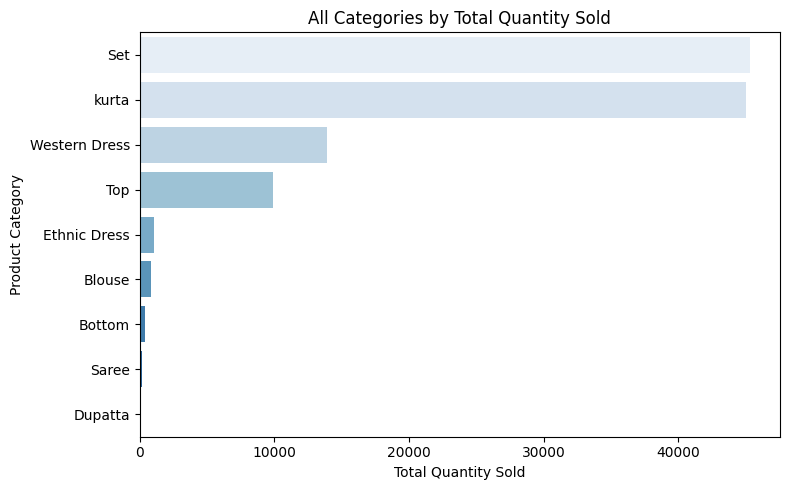

In [ ]:
# find total quantity sold per category
category_sales = df.groupby('Category')['Qty'].sum().reset_index().sort_values(by='Qty', ascending=False)

# Plot the data using Seaborn for a better visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Qty', y='Category', data=category_sales, palette='Blues')
# Adding labels and title
plt.title('All Categories by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
# Show the plot
plt.show()

###**Identify Peak Sales by week days**

<ipython-input-15-c437faa11cce>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sd['Date'] = pd.to_datetime(sd['Date'])


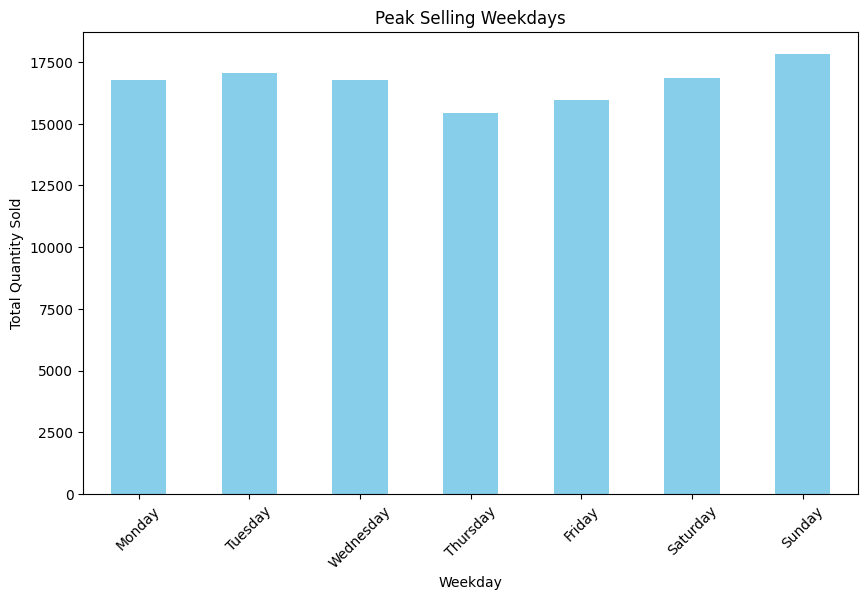

In [ ]:
import calendar
# Peak Selling weekdays
sd['Date'] = pd.to_datetime(sd['Date'])
weekday_sales = sd.groupby(sd['Date'].dt.day_name())['Qty'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', color='skyblue', figsize=(10, 6), title='Peak Selling Weekdays', xlabel='Weekday', ylabel='Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

###**Identify Peak Sales by months**

<ipython-input-16-fab87d16d488>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


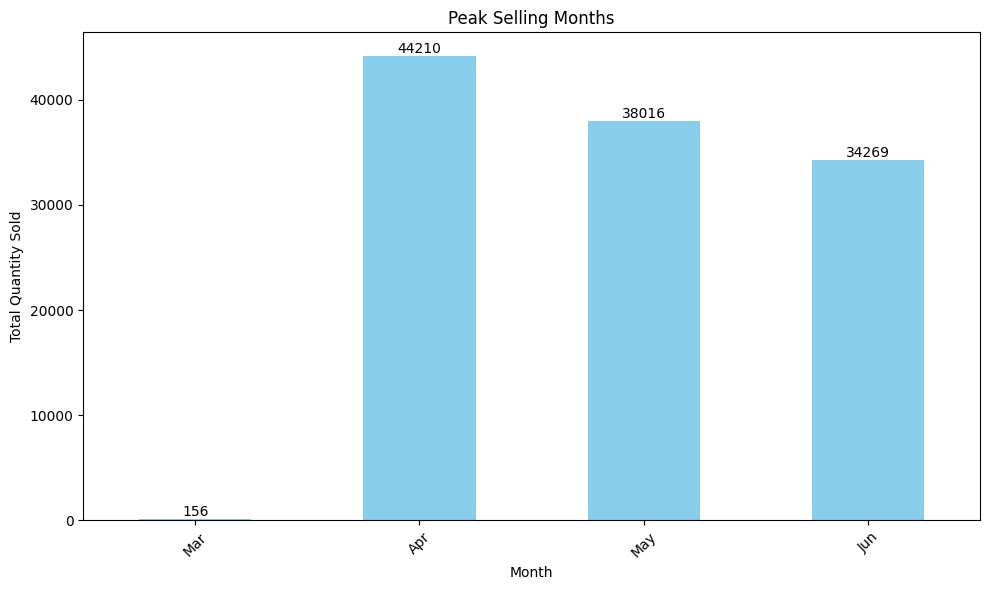

In [ ]:
import calendar
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Qty' and 'Date' are your relevant columns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract 'Month' from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Month' and sum the 'Qty' values for each month
monthly_sales = df.groupby(df['Month'])['Qty'].sum()

# Plot the bar chart for Peak Selling Months
plt.figure(figsize=(10, 6))
ax = monthly_sales.plot(kind='bar', color='skyblue', title='Peak Selling Months', xlabel='Month', ylabel='Total Quantity Sold')

# Get the months that actually exist in the data
existing_months = monthly_sales.index

# Set x-ticks to show only the existing months
plt.xticks(ticks=range(len(existing_months)), labels=[calendar.month_abbr[m] for m in existing_months], rotation=45)

# Add data labels on top of each bar
for i, value in enumerate(monthly_sales):
    ax.text(i, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10)  # Add labels slightly above the bar

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().nlargest(3)

,Amount
Date,
2022-04,30647735.96
2022-05,27737127.75
2022-06,24798550.38


###**Top performing 'City'**

In [ ]:
# calculating top performing 'City'
top_performing_location = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(5)
top_performing_location

,Amount
ship-city,
BENGALURU,7168345.99
HYDERABAD,5227277.82
MUMBAI,3859728.80
NEW DELHI,3821817.78
CHENNAI,3273076.74


###**Top performing 'state'**

In [ ]:
# calculating top performing 'state'
df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(8)

,Amount
ship-state,
MAHARASHTRA,14051391.14
KARNATAKA,11041795.37
TELANGANA,7333985.65
UTTAR PRADESH,7232467.08
TAMIL NADU,6921696.11
DELHI,4469778.97
KERALA,4092797.58
WEST BENGAL,3758705.44


###**Top performing location - state - Treemap**

In [ ]:
import plotly.express as px
#Top performing location - state

# Group by 'ship-state' then sum the sales 'Amount'
state_sales = df.groupby(['ship-state'])['Amount'].sum().reset_index()

# Create a Treemap
fig = px.treemap(state_sales,
                 path=['ship-state'],  # Hierarchical path
                 values='Amount',
                 color='Amount',  # Color by sales amount
                 color_continuous_scale='Viridis',  # Color scale
                 title='Sales by State')

# Show the Treemap
fig.show()

###**Identify Trends of the Cancellation orders by state**

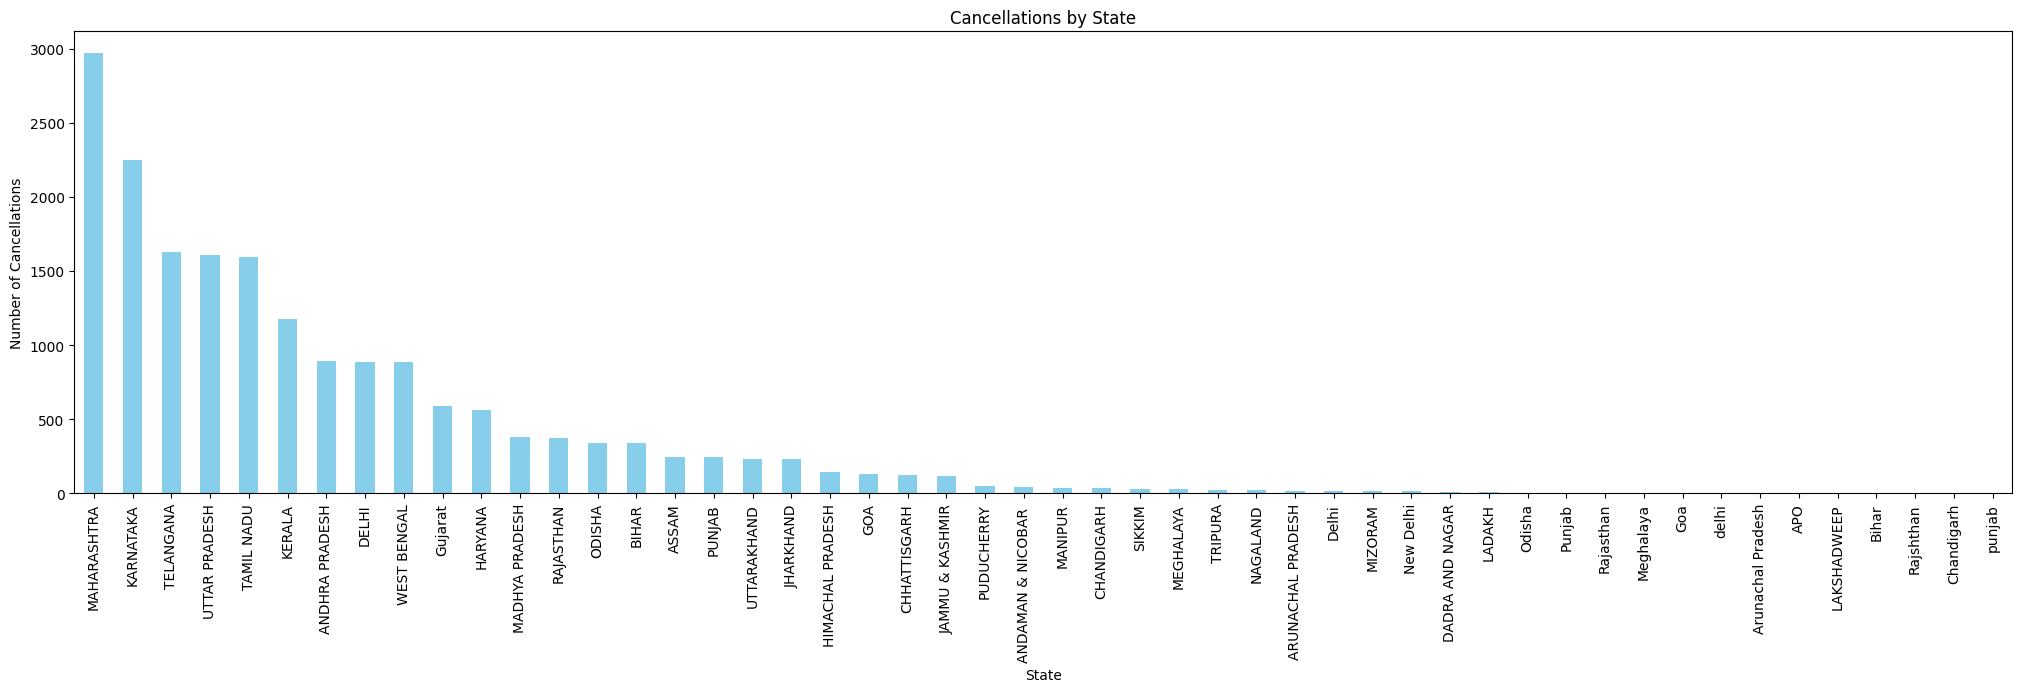

In [ ]:
# Filter for cancelled orders (assuming 'Status' column indicates cancellation)
canceled_orders = sd[sd['Status'] == 'Cancelled']

# Group by state and count cancellations
state_cancellations = canceled_orders.groupby('ship-state')['Order ID'].count().sort_values(ascending=False)

# Plot cancellations by state
state_cancellations.plot(kind='bar', color='Skyblue', figsize=(25, 6), title='Cancellations by State')
plt.xlabel('State')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=90)
plt.show()

##**Logistics Issues**

In [ ]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128949 non-null  object        
 1   Date                128949 non-null  datetime64[ns]
 2   Status              128949 non-null  object        
 3   Fulfilment          128949 non-null  object        
 4   Sales Channel       128949 non-null  object        
 5   ship-service-level  128949 non-null  object        
 6   Style               128949 non-null  object        
 7   SKU                 128949 non-null  object        
 8   Category            128949 non-null  object        
 9   Size                128949 non-null  object        
 10  ASIN                128949 non-null  object        
 11  Courier Status      122078 non-null  object        
 12  Qty                 128949 non-null  int64         
 13  currency            121155 no

In [ ]:
# Calculate the count of specific values in the 'Calculated Status' column
return_and_cancelled_counts = sd['Status'].value_counts()

# Filter the counts for 'Shipped - Return to Seller', 'Cancelled', and 'Shipped - Returning to Seller'
specific_status_counts = return_and_cancelled_counts[
    return_and_cancelled_counts.index.isin(['Shipped - Returned to Seller', 'Cancelled', 'Shipped - Returning to Seller'])
]

# Calculate the total count of the filtered statuses
cancelled_orders = specific_status_counts.sum()

# Display the cancelled orders
specific_status_counts, cancelled_orders


(Status
 Cancelled                        18341
 Shipped - Returned to Seller      1953
 Shipped - Returning to Seller      145
 Name: count, dtype: int64,
 20439)

###**Categories by Cancellations**

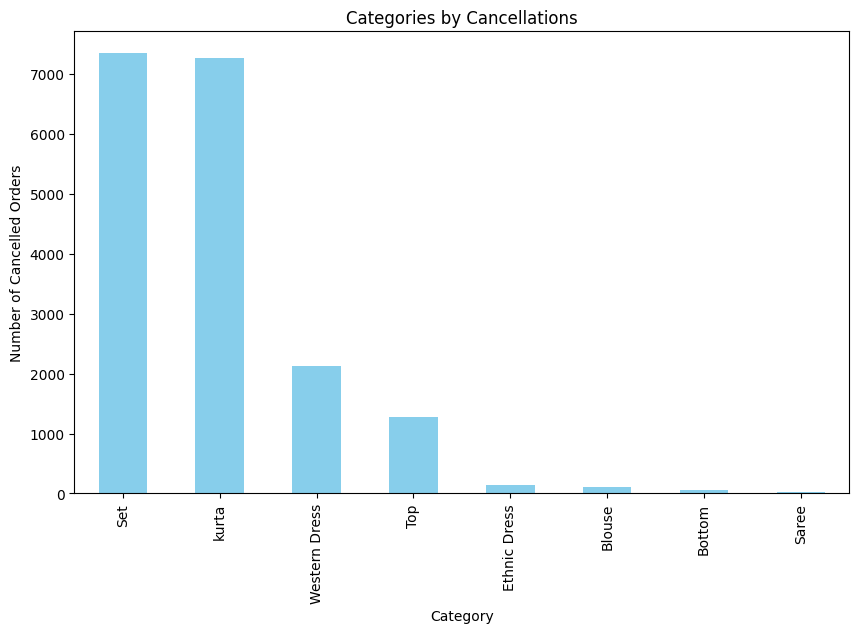

In [ ]:

category_cancellations = sd[sd['Status'] == 'Cancelled'].groupby('Category')['Order ID'].count().sort_values(ascending=False).head(10)

# Categories by Cancellations
plt.figure(figsize=(10, 6))
category_cancellations.plot(kind='bar', color='skyblue')
plt.title('Categories by Cancellations')
plt.ylabel('Number of Cancelled Orders')
plt.show()

###**Percentage of orders fulfilled by Amazon vs Merchant**

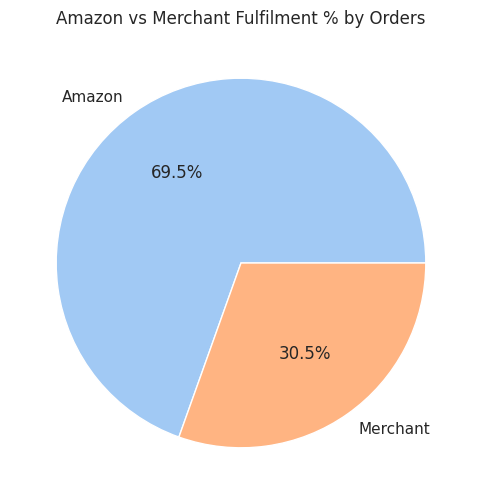

In [ ]:
# Amazon Vs merchant  % pie chart  by order

# Fulfilment analysis
fulfilment_percentages = sd['Fulfilment'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
fulfilment_percentages.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette("pastel"),
    title="Amazon vs Merchant Fulfilment % by Orders"
)
plt.ylabel('')  # Remove y-axis label
plt.show()

###**Count the B2B vs B2C**

In [ ]:
#Differentiating B2B vs B2C
b2b_orders = sd[sd['B2B'] == True].shape[0]
b2c_orders = sd[sd['B2B'] == False].shape[0]
b2b_orders,b2c_orders



(871, 128078)

###**High return distribution for each status by category**

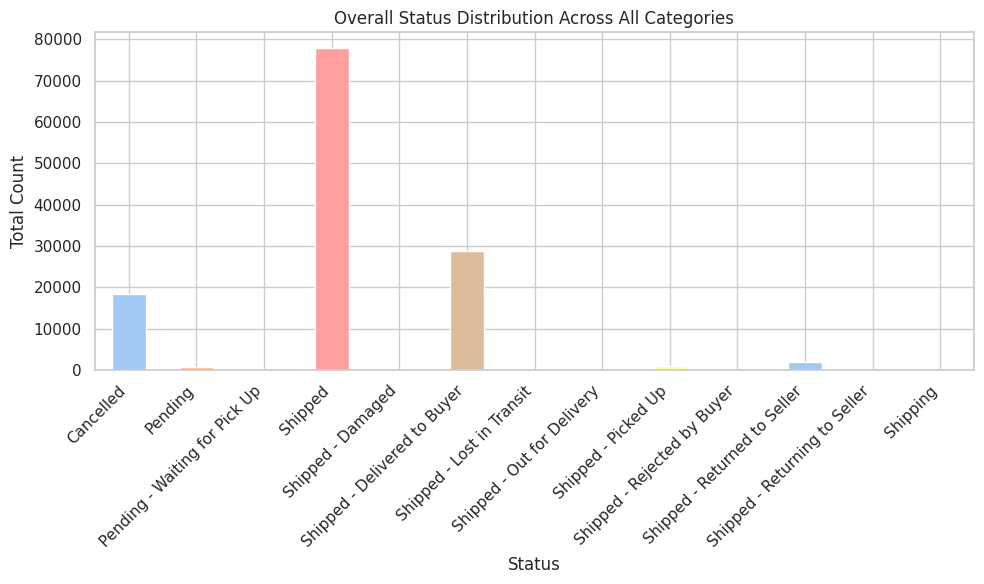

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# df is the original DataFrame containing 'Category' and 'Status' columns

# Step 1: Calculate status counts by category
status_by_category = df.groupby(['Category', 'Status']).size().unstack(fill_value=0)

# Step 2: Sum counts across categories for each status (Total Sum)
status_total = status_by_category.sum(axis=0)

# Step 3: Plot a bar chart for the total status distribution (without percentages)
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Plot the total sum of occurrences for each status
status_total.plot(
    kind='bar',
    color=sns.color_palette("pastel"),
    title='Overall Status Distribution Across All Categories'
)

# Step 4: Add axis labels for clarity
plt.xlabel('Status')  # X-axis label
plt.ylabel('Total Count')  # Y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure the layout looks good
plt.show()


**Analyze Shipping and Delivery Data:**
*   Investigate the reasons behind the "Cancelled" status for a significant
number of orders. Understanding customer reasons for cancellations could lead to improved sales strategies and customer satisfaction.
*   Ensure the customer reasons for cancellation like due to delay , size and damage
*  Ensuring faster and more efficient shipping could increase customer satisfaction and reduce cancellations, especially for time-sensitive orders.






#**Conclusion and Insights**


From the analysis of the sales data, several key insights were obtained:
1.	Total Revenue and Average Order Value:
o	The total revenue for the dataset is approximately 83,291K INR.
o	The average order value (AOV) is about 645.92 INR, suggesting that, on average, customers are spending around this amount per order.
2.	Top Selling Products and Categories:
o	The "Set" (45288) category is the highest-selling product category in terms of quantity, followed closely by "kurta," "Western Dress," and "Top."
o	The "Set" category also leads in terms of revenue, followed by "kurta" and "Western Dress," indicating that while "Set" is the most sold category, it also brings in substantial revenue.
3.	Quantity and Revenue Analysis:
o	The data highlights a strong correlation between quantity sold and revenue in certain categories, such as "Set" and "kurta." These categories drive a large portion of the business.
o	The "Ethnic Dress," "Blouse," "Bottom," and "Saree" categories have lower sales and revenues, which may indicate niche markets or less demand.
4.	Impact of Null Values:
o	Missing values in the "Amount" and "currency" columns were handled effectively by replacing them with the median value, ensuring data consistency without compromising the overall analysis.
5.	Shipping and Delivery Trends:
o	The shipping data shows that a majority of orders are processed and delivered on time, with "Shipped" being the most frequent status.


#**Recommendations**

1.  Focus on High-Performing Categories:
o	Since "Set" and "kurta" are the top-selling categories in terms of both quantity and revenue, these categories should be prioritized in marketing and inventory management to drive further sales.
o	It is advisable to analyze consumer preferences in these categories and ensure availability of popular styles and sizes.
2.	Enhance Marketing for Low-Performing Categories:
o	For categories like "Ethnic Dress," "Blouse," "Bottom," and "Saree," which have lower sales, targeted marketing campaigns or promotional offers could help boost their visibility and sales.
o	Consider running promotions or bundling these items with higher-performing categories to improve sales.
3.	Analyze Shipping and Delivery Data:
o	Investigate the reasons behind the "Cancelled" status for a significant number of orders. Understanding customer reasons for cancellations could lead to improved sales strategies and customer satisfaction.
o	Ensure the customer reasons for cancellation like due to delay , size and damage
o	Ensuring faster and more efficient shipping could increase customer satisfaction and reduce cancellations, especially for time-sensitive orders.
4.	Improving Order Value:
o	The average order value is a good metric, but there could be potential to increase it through strategies like cross-selling, upselling, or bundling products together.
o	Special offers for larger orders or discounts on the next purchase could be implemented to encourage higher spending per order.
5.	Improve Data Completeness:
o	There is a considerable amount of missing data in fields like "currency," "ship-city," and "promotion-ids." Further investigation into why these values are missing and filling the gaps could provide more comprehensive insights for better decision-making.


In [ ]:
##sales_dataset.csv
# Replace 'df' with the variable name of your cleaned DataFrame
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sum= df['Amount'].sum()
print(sum)

83290542.94
